In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline


In [2]:
# read csv

df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")
df_raw.to_csv("playstore_reviews.csv")

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [4]:
df_raw.sample(10)

,package_name,review,polarity
883,com.rovio.angrybirds,"great game, but too many ads almost not wort...",1
329,com.viber.voip,can't open after update the app crashes and d...,0
529,com.dropbox.android,huh? i don't get it. i put a password on it a...,0
773,com.shirantech.kantipur,way below expection. why does it lag so much?...,0
283,com.tencent.mm,server error 1-1 cannot login..server error 1...,0
114,com.linkedin.android,smh linkedin will not allow me to send connec...,0
433,com.facebook.orca,"app continuously losses connection, at times...",0
230,com.supercell.clashofclans,new update killed the game new matching for a...,0
597,com.evernote,fantastic and helpful i find this app so help...,1
127,com.king.candycrushsaga,what is the point of having the jackpot when...,0


In [5]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
polarity,891.0,0.344557,0.47549,0.0,0.0,0.0,1.0,1.0


In [6]:
# Check for missing values

print(df_raw.isnull().sum())

package_name    0
review          0
polarity        0
dtype: int64


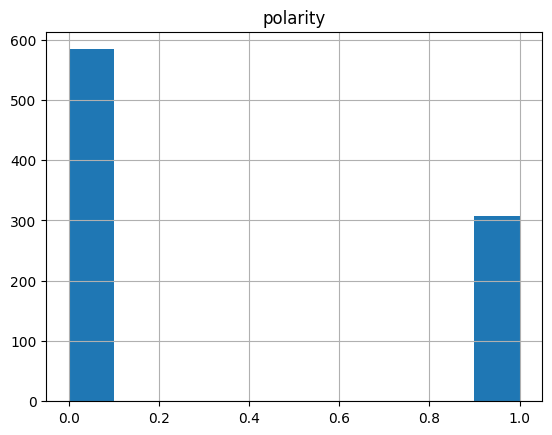

In [9]:
# Histograms

df_raw.hist()
plt.show()

In [12]:
processed_df = df_raw.copy()
processed_df['polarity'].value_counts()

polarity
0    584
1    307
Name: count, dtype: int64

In [14]:
# 1) split data
X = processed_df['review']
y = processed_df['polarity']

# 2) split sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2001)

In [15]:
# Naive Bayyy

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy: 0.6927374301675978
Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.99      0.81       117
           1       0.89      0.13      0.23        62

    accuracy                           0.69       179
   macro avg       0.79      0.56      0.52       179
weighted avg       0.75      0.69      0.61       179

